In [547]:
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd
import numpy as np
import os
from csv import writer
from sklearn.metrics import mean_squared_error
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.ui import Select
import time
import json
import urllib
from csv import DictWriter
                      
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from scipy import stats

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [548]:
PATH = 'C:/Users/shake/Sdata/chromedriver.exe'
dataPath = 'C:/Users/shake/Sdata/data/'

In [549]:
#df_2020 = pd.DataFrame()
df_2019 = pd.DataFrame()
df_2018 = pd.DataFrame()
df_2017 = pd.DataFrame()
df_2016 = pd.DataFrame()

dic_years = {'2019':df_2019, '2018':df_2018, '2017':df_2017, '2016':df_2016} 

In [550]:
#/////////////////////fix duplicates columns////////////////////////////////////////////////////////////////////////////////

def get_tables():
    i = 0
    arr = []
    driver.execute_script("""
    document.querySelectorAll("a[aria-hidden=true],span[aria-hidden=true]").forEach(function(e) {
        e.parentElement.removeChild(e);
    });
    """)
    time.sleep(5)
    temp_html = driver.find_element(By.CSS_SELECTOR, "html").get_attribute('outerHTML')
    df_school = pd.read_html(temp_html, attrs = {'class':'zebraTable ng-scope'})[0]
    for columns in df_school:
        arr.append(df_school.columns[i][0])
        i = i + 1
    df_school.columns = arr
    return df_school

In [551]:
def GetYearsDemography(fileName,url):
    try:
        driver.get(url)
        driver.implicitly_wait(20)
        driver.maximize_window()
        selectSubtext = driver.find_element(By.ID, "select2-chosen-4")
        selectSubtext.click()
        driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[" + "7" + "]").click()
        time.sleep(10)
        selectCity = driver.find_element(By.ID, "select2-chosen-8")
        selectCity.click()
        time.sleep(1)
        options = driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]")
        AllOpt = options.find_elements_by_css_selector("li")

        countOpt=len(AllOpt)
        driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + "1" + "]").click()

        dfData = pd.DataFrame()
        firstTime = True
        for i in range(1, countOpt):

            driver.find_element(By.ID, "select2-chosen-4").click()
            driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[" + "7" + "]").click()
            selectCity = driver.find_element(By.ID, "select2-chosen-8")
            selectCity.click()
            driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + str(i) + "]").click()
            year = selectCity.text
            temp = get_tables()
            temp.insert(0, "Years", year, True)
            print(temp)
            dfData = dfData.append(temp, ignore_index=True)
            if firstTime:
                temp.to_csv(fileName, mode='a', encoding='utf-8-sig',index=False)
                firstTime = False
            else:
                temp.to_csv(fileName, mode='a', encoding='utf-8-sig',index=False, header=False)


    except BaseException as e:
        print("Invalid URL")
    driver.quit()
    return dfData


In [552]:
#/////////////education status//////////////////////////////////////////////////////////////////////////////////////////////

options = webdriver.ChromeOptions() 
options.add_argument("--enable-webgl-developer-extensions") 
options.add_argument("--enable-webgl-draft-extensions") 
driver = webdriver.Chrome(PATH,options=options)
driver.vars = {}
url = "https://boardsgenerator.cbs.gov.il/pages/WebParts/YishuvimPage.aspx?level_1=%D7%A9%D7%9B%D7%A8%20/%20%D7%94%D7%9B%D7%A0%D7%A1%D7%95%D7%AA"
driver.get(url)
time.sleep(2)
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
time.sleep(2)
actions.move_to_element(element).perform()
element = driver.find_element(By.CSS_SELECTOR, "body")
actions = ActionChains(driver)
actions.move_to_element(element).perform()
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
time.sleep(2)
actions.move_to_element(element).click_and_hold().perform()
element = driver.find_element(By.ID, "select2-drop-mask")
actions = ActionChains(driver)
actions.move_to_element(element).release().perform()
driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[10]").click()
time.sleep(5)
for i in range(2, 6):
    selectCity = driver.find_element(By.ID, "select2-chosen-8")
    selectCity.click()
    time.sleep(10)
    driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + str(i) + "]").click()
    time.sleep(10)
    df_temp = get_tables()
    year = selectCity.text
    #print(year)
    dic_years[year] = df_temp
    
    dic_years[year].insert(0, "year", year, True)
driver.quit()
dic_years[year]

<ipython-input-552-67e8cbb174a3>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH,options=options)


,year,סמל היישוב,שם יישוב,"ילדים בגנים של משרד החינוך סה""כ תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 3 תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 4 תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 5 תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 6 תשע""ו 2015/16","בתי ספר סה""כ תשע""ו 2015/16","בתי ספר יסודיים (כולל חינוך מיוחד) תשע""ו 2015/16",...,"תלמידים בבתי ספר על-יסודיים תשע""ו 2015/16","תלמידים בחטיבות ביניים תשע""ו 2015/16","תלמידים בבתי ספר תיכוניים תשע""ו 2015/16","ממוצע תלמידים לכיתה סה""כ תשע""ו 2015/16","ממוצע תלמידים לכיתה בבתי ספר יסודיים (כולל חינוך מיוחד) תשע""ו 2015/16","ממוצע תלמידים לכיתה בבתי ספר על-יסודיים תשע""ו 2015/16","ממוצע תלמידים לכיתה בחטיבות ביניים תשע""ו 2015/16","ממוצע תלמידים לכיתה בבתי ספר תיכוניים תשע""ו 2015/16","אחוז זכאים לתעודת בגרות מבין תלמידי כיתות יב תשע""ו 2015/16","אחוז זכאים לתעודת בגרות שעמדו בדרישות הסף של האוניברסיטאות מבין תלמידי כיתות יב תשע""ו 2015/16"
0,2016,472,אבו גוש,375,148,113,112,..,5,4,...,700,323,377,20.00,19.00,20.00,27,16.00,49.20,35.80
1,2016,473,אבו סנאן,670,224,207,230,9,6,4,...,1384,723,661,23.00,22.00,25.00,26,24.00,56.10,39.20
2,2016,182,אבן יהודה,740,215,244,255,26,8,6,...,1906,613,1293,28.00,27.00,31.00,34,29.00,81.10,71.70
3,2016,2710,אום אל-פחם,3588,1151,1144,1183,110,29,18,...,7292,3563,3729,25.79,24.85,26.81,29,25.20,52.90,32.40
4,2016,31,אופקים,1754,566,553,525,110,25,18,...,1978,582,1396,20.42,19.95,21.27,22,20.84,51.70,34.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2016,538,שעב,427,149,148,127,3,3,..,...,756,427,329,25.00,24.00,26.00,27,25.00,64,52.30
197,2016,8800,שפרעם,2012,634,665,676,37,24,15,...,4238,1853,2385,26.14,25.56,26.82,29,25.11,47.70,41.20
198,2016,5000,תל אביב -יפו,17327,5168,5786,5733,640,163,103,...,23370,10333,13037,24.03,23.63,24.57,27,22.87,74,65.40
199,2016,154,תל מונד,625,171,200,223,31,5,4,...,1751,725,1026,31.00,28.00,35.00,38,33.00,89.40,84.30


In [554]:
df_years_temp = pd.DataFrame(columns=['year', 'city', 'number_of_high_schools', 'number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'number_of_high_school_students', 'number_of_high_school_graduates_with_potential_in_percent', 'Registration_for_higher_education_within_8_years_in_percent', 'number_of_students_in_percent'])
df_education = pd.DataFrame()
print(df_temp[df_temp['שם יישוב'] == 'ירושלים'])

for i in dic_years:
    #print(i)
    if(i == '2015'):
        break
    df_temp = dic_years[i]
    df_years_temp['year'] = df_temp.iloc[:,0].values
    df_years_temp['city'] = df_temp.iloc[:,2].values
    df_years_temp['number_of_high_schools'] = df_temp.filter(regex="בתי ספר תיכוניים")
    df_years_temp['number_of_high_school_graduates_with_potential_in_percent'] = df_temp.filter(regex="אחוז זכאים לתעודת בגרות שעמדו בדרישות הסף של האוניברסיטאות")
    df_years_temp['number_of_high_school_graduates_in_percent'] = df_temp.filter(regex="אחוז זכאים לתעודת בגרות מבין תלמידי כיתות יב")
    df_years_temp['number_of_high_school_students'] = df_temp.filter(regex="תלמידים בבתי ספר תיכוניים")
    if(i != '2016'):
        df_years_temp['Registration_for_higher_education_within_8_years_in_percent'] = df_temp.filter(regex="השכלה גבוהה אחוז הנכנסים להשכלה גבוהה בתוך 8 שנים בקרב תלמידי יב")
        df_years_temp['number_of_students_in_percent'] = df_temp.filter(regex="השכלה גבוהה אחוז סטודנטים מתוך כלל האוכלוסייה")
        df_years_temp['number_of_bachelor_graduates_in_percent'] = df_temp.filter(regex="השכלה גבוהה אחוז בעלי תארים מישראל")
    df_education = df_education.append(df_years_temp)
df_education.to_csv(dataPath + 'dfEducation.csv', mode='w+', encoding='utf-8-sig',index=False)    
#df_education[df_education['city'] == 'ירושלים']
df_education

    year  סמל היישוב שם יישוב  ילדים בגנים של משרד החינוך סה"כ תשע"ו 2015/16  \
85  2016        3000  ירושלים                                          53792   

    ילדים בגנים של משרד החינוך גיל 3 תשע"ו 2015/16  \
85                                           15674   

    ילדים בגנים של משרד החינוך גיל 4 תשע"ו 2015/16  \
85                                           17812   

    ילדים בגנים של משרד החינוך גיל 5 תשע"ו 2015/16  \
85                                           17990   

   ילדים בגנים של משרד החינוך גיל 6 תשע"ו 2015/16 בתי ספר סה"כ תשע"ו 2015/16  \
85                                           2316                        679   

   בתי ספר יסודיים (כולל חינוך מיוחד) תשע"ו 2015/16  ...  \
85                                              389  ...   

   תלמידים בבתי ספר על-יסודיים תשע"ו 2015/16  \
85                                     73917   

   תלמידים בחטיבות ביניים תשע"ו 2015/16  \
85                                18437   

   תלמידים בבתי ספר תיכוניים תשע"ו 2015/16  \


,year,city,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent
0,2019,אבו גוש,3,13.03,59.29,361,37.17,..,3.74
1,2019,אבו סנאן,3,12.09,65.81,592,52.56,28.50,2.32
2,2019,אבן יהודה,3,55.59,83.96,1087,76.89,46.10,3.03
3,2019,אום אל-פחם,13,8.52,59.40,3838,44.16,23.30,2.11
4,2019,אופקים,11,12.26,50.24,1551,39.81,26.60,1.84
...,...,...,...,...,...,...,...,...,...
196,2016,שעב,..,8.50,64,329,52.30,..,2.50
197,2016,שפרעם,9,9.70,47.70,2385,41.20,30.90,2.40
198,2016,תל אביב -יפו,64,41.10,74,13037,65.40,51.60,4.80
199,2016,תל מונד,..,51.30,89.40,1026,84.30,60,3.50


In [555]:
options = webdriver.ChromeOptions() 
options.add_argument("--enable-webgl-developer-extensions") 
options.add_argument("--enable-webgl-draft-extensions") 
driver = webdriver.Chrome(PATH,options=options)
driver.vars = {}
url = "https://boardsgenerator.cbs.gov.il/pages/WebParts/YishuvimPage.aspx?level_1=%D7%A9%D7%9B%D7%A8%20/%20%D7%94%D7%9B%D7%A0%D7%A1%D7%95%D7%AA"
driver.get(url)
time.sleep(2)
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
time.sleep(2)
actions.move_to_element(element).perform()
element = driver.find_element(By.CSS_SELECTOR, "body")
actions = ActionChains(driver)
actions.move_to_element(element).perform()
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
time.sleep(2)
actions.move_to_element(element).click_and_hold().perform()
element = driver.find_element(By.ID, "select2-drop-mask")
actions = ActionChains(driver)
time.sleep(2)
actions.move_to_element(element).release().perform()
driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[8]").click()
time.sleep(5)
for i in range(1, 6):
    selectCity = driver.find_element(By.ID, "select2-chosen-8")
    selectCity.click()
    time.sleep(10)
    driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + str(i) + "]").click()
    time.sleep(12)
    df_temp = get_tables()
    year = selectCity.text
    #print(year)
    dic_years[year] = df_temp
    dic_years[year].insert(0, "year", year, True)
driver.quit()
dic_years[year]

<ipython-input-555-12c16bc868df>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH,options=options)


,year,סמל היישוב,שם יישוב,"שכר ממוצע לחודש של שכירים (ש""ח) כלל השכירים","שכר ממוצע לחודש של שכירים (ש""ח) גברים","שכר ממוצע לחודש של שכירים (ש""ח) נשים",אחוז שינוי ריאלי לעומת השנה הקודמת של שכר ממוצע לחודש של שכירים כלל השכירים,אחוז שינוי ריאלי לעומת השנה הקודמת של שכר ממוצע לחודש של שכירים גברים,אחוז שינוי ריאלי לעומת השנה הקודמת של שכר ממוצע לחודש של שכירים נשים,מספר השכירים,אחוז השכירים המשתכרים עד שכר מינימום,מספר העצמאים,"הכנסה ממוצעת לחודש של העצמאים (ש""ח)",אחוז שינוי ריאלי של הכנסה ממוצעת לחודש של העצמאים לעומת השנה הקודמת,אחוז העצמאים המשתכרים עד מחצית השכר הממוצע,"מדד אי-השוויון שכירים (מדד ג'יני, 0 שוויון מלא)"
0,2015,472,אבו גוש,6275.59,6928.63,5240.03,4.7,3.9,6.3,2728,42.2,130,6656.52,-0.8,53.1,0.34
1,2015,473,אבו סנאן,6060.40,7314.21,4302.60,4.3,5.3,2.3,4900,49.7,435,7940.37,9.8,44.6,0.39
2,2015,182,אבן יהודה,13502.86,16816.52,10097.43,5.2,3.6,5.7,6077,27.6,660,12913.98,-1.3,32.3,0.48
3,2015,2710,אום אל-פחם,5289.00,6096.00,3811.00,3.0,2.4,5.9,16739,56.9,1487,7864.00,3.0,44.5,0.38
4,2015,31,אופקים,9496.00,12155.00,7006.00,6.4,6.7,5.0,2967,38.1,231,9128.00,19.6,39.4,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2015,538,שעב,5312.02,6020.50,4112.21,4.7,4.1,6.9,2443,52.6,150,6452.12,3.8,60.0,0.35
220,2015,8800,שפרעם,6142.00,7286.00,4489.00,3.7,4.8,2.2,15471,48.8,1109,8546.00,7.1,41.8,0.38
221,2015,5000,תל אביב -יפו,10808.00,12888.00,8667.00,5.8,6.0,4.5,224083,31.9,23222,11685.00,6.2,37.5,0.47
222,2015,154,תל מונד,14056.74,17904.35,10202.37,4.1,4.3,2.9,5699,28.5,603,13015.24,5.9,31.0,0.50


In [556]:
df_employees_info = pd.DataFrame()
df_years_temp = pd.DataFrame(columns=['year', 'city','number_of_self_employees', 'number_of_employees', 'employees_average_monthly_wage', 'employees_average_monthly_wage_change_in_percent', 'self_employees_average_monthly_wage'])
for i in dic_years:
    #print(i)
    if(i == '2015'):
        break
    df_temp = dic_years[i]
    df_years_temp['year'] = df_temp.iloc[:,0].values
    df_years_temp['city'] = df_temp.iloc[:,2].values
    df_years_temp['number_of_self_employees'] =  df_temp.iloc[:,11].values
    df_years_temp['number_of_employees'] = df_temp.iloc[:,9].values
    df_years_temp['employees_average_monthly_wage'] = df_temp.iloc[:,3].values
    df_years_temp['employees_average_monthly_wage_change_in_percent'] = df_temp.iloc[:,6].values
    df_years_temp['self_employees_average_monthly_wage'] = df_temp.iloc[:,12].values
    df_employees_info = df_employees_info.append(df_years_temp)

# drop שעב 2016 row/////////////////////////////////////////////////         
df_employees_info.drop
df_employees_info.drop(df_employees_info.index[219], inplace=True)
#//////////////////////////////////////////////////////////////////
        
    
df_employees_info.to_csv(dataPath + 'dfEmployees.csv', mode='w+', encoding='utf-8-sig',index=False)
df_employees_info

,year,city,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage
0,2019,אבו גוש,151,3393,7294.03,1.35,10064.79
1,2019,אבו סנאן,626,5841,7071.17,1.95,8456.80
2,2019,אבן יהודה,899,6265,14054.00,1.58,12517.09
3,2019,אום אל-פחם,1918,22149,5869.82,1.16,8883.18
4,2019,אופקים,295,3342,9398.05,0.38,11301.74
...,...,...,...,...,...,...,...
218,2016,שלומי,218,3157,8164.68,1.59,10706.09
220,2016,שפרעם,1161,16307,6236.00,2.00,8996.00
221,2016,תל אביב -יפו,24447,223935,11017.00,2.50,11908.00
222,2016,תל מונד,660,5819,13983.03,-0.02,13735.86


In [557]:

df_education = pd.read_csv(dataPath + 'dfEducation.csv')
df_employees_info = pd.read_csv(dataPath + 'dfEmployees.csv')

df_eduoEmplo = [df_education, df_employees_info]
df_eduoEmplo = pd.merge(df_education, df_employees_info,  how='left', left_on=['year','city'], right_on = ['year','city'])
df_eduoEmplo


,year,city,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage
0,2019,אבו גוש,3,13.03,59.29,361,37.17,..,3.74,151.0,3393.0,7294.03,1.35,10064.79
1,2019,אבו סנאן,3,12.09,65.81,592,52.56,28.50,2.32,626.0,5841.0,7071.17,1.95,8456.80
2,2019,אבן יהודה,3,55.59,83.96,1087,76.89,46.10,3.03,899.0,6265.0,14054.00,1.58,12517.09
3,2019,אום אל-פחם,13,8.52,59.40,3838,44.16,23.30,2.11,1918.0,22149.0,5869.82,1.16,8883.18
4,2019,אופקים,11,12.26,50.24,1551,39.81,26.60,1.84,295.0,3342.0,9398.05,0.38,11301.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016,שעב,..,8.50,64,329,52.30,..,2.50,NaN,NaN,NaN,NaN,NaN
800,2016,שפרעם,9,9.70,47.70,2385,41.20,30.90,2.40,1161.0,16307.0,6236.00,2.00,8996.00
801,2016,תל אביב -יפו,64,41.10,74,13037,65.40,51.60,4.80,24447.0,223935.0,11017.00,2.50,11908.00
802,2016,תל מונד,..,51.30,89.40,1026,84.30,60,3.50,660.0,5819.0,13983.03,-0.02,13735.86


In [558]:
fileName= dataPath + 'YearsDemography.csv'

if os.path.isfile(fileName):
    dfDemography = pd.read_csv(fileName)
else:
    url = "https://boardsgenerator.cbs.gov.il/pages/WebParts/YishuvimPage.aspx?level_1=%D7%A9%D7%9B%D7%A8%20/%20%D7%94%D7%9B%D7%A0%D7%A1%D7%95%D7%AA"
    driver = webdriver.Chrome(PATH)
    dfDemography = GetYearsDemography(fileName,url)
    
dfDemography

,Years,שם יישוב,סמל היישוב,"צפיפות אוכלוסייה לקמ''ר ביישובים שמנו 5,000 תושבים ויותר","סה""כ אוכלוסייה בסוף השנה",יהודים ואחרים (אחוזים),יהודים (אחוזים מתוך יהודים ואחרים),ערבים (אחוזים),מוסלמים (אחוזים מתוך האוכלוסייה הערבית),נוצרים (אחוזים מתוך האוכלוסייה הערבית),...,"נישאים שיעור ל-1,000 תושבים לא נשואים בני 15 ומעלה 2019","מתגרשים סה""כ גברים ונשים 2019","מתגרשים שיעור ל-1,000 תושבים נשואים בני 15 ומעלה 2019",אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך מוסדות דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך דיירי דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים בבתי אבות ובדיור מוגן,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות חינוך,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות דת,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אשפוז כולל הוסטלים,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אחרים
0,2020,אבו גוש,472,4114.4,7771.0,-,-,98.9,99.8,-,...,44.6,26,8.1,4,31,-,0.3,0.04,0.06,-
1,2020,אבו סנאן,473,2136.9,14306.0,-,-,99.8,54.6,15.2,...,42.2,29,4.7,-,-,-,-,-,-,-
2,2020,אבן יהודה,182,1696.2,14020.0,100,98.4,-,-,-,...,20,40,7,5,347,1.35,0.3,-,0.83,-
3,2020,אום אל-פחם,2710,2187.4,56777.0,-,-,99.9,100,-,...,53.7,104,4.5,..,..,..,..,..,..,..
4,2020,אופקים,31,1990.8,32555.0,99.3,93.4,-,-,-,...,44.5,119,10.7,6,559,0.87,0.58,0.17,-,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,2003,שעב,538,2.9,2.8,14.04,13.56,13.17,9.43,17.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3593,2003,שפרעם,8800,15.7,15.5,13.2,12.5,10.9,8.33,16.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3594,2003,תל אביב -יפו,5000,173.8,189.6,7,5.5,4.8,5.2,18.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3595,2003,תל מונד,154,4,3.9,11.43,10.62,9.73,7.77,12.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [559]:
dfDemography=dfDemography.rename(columns={"Years":"year"})
dfDemography=dfDemography.rename(columns={"שם יישוב":"city"})
dfDemography=dfDemography.rename(columns={'סה"כ אוכלוסייה בסוף השנה':"population"})
dfDemography=dfDemography.rename(columns={'אחוז באוכלוסייה בסוף השנה בני 19-15':"Percentage of population at the end of the year aged 19-15"})
dfDemography=dfDemography.rename(columns={'אחוז באוכלוסייה בסוף השנה בני 29-20':"Percentage of population at the end of the year aged 20-29"})
dfDemography=dfDemography.rename(columns={'אחוז באוכלוסייה בסוף השנה בני 44-30':"Percentage of population at the end of the year aged 30-44"})

dfYearsCityPop=dfDemography

populationList = dfYearsCityPop['population'].tolist()
for i in range(len(populationList)):
    if (populationList[i] <= 1000) :
            populationList[i] = populationList[i] * 1000

dfYearsCityPop['population'] = populationList
dfYearsCityPop.to_csv(dataPath + 'dfYearsCityPop.csv', mode='w+', encoding='utf-8-sig',index=False)
dfYearsCityPop

,year,city,סמל היישוב,"צפיפות אוכלוסייה לקמ''ר ביישובים שמנו 5,000 תושבים ויותר",population,יהודים ואחרים (אחוזים),יהודים (אחוזים מתוך יהודים ואחרים),ערבים (אחוזים),מוסלמים (אחוזים מתוך האוכלוסייה הערבית),נוצרים (אחוזים מתוך האוכלוסייה הערבית),...,"נישאים שיעור ל-1,000 תושבים לא נשואים בני 15 ומעלה 2019","מתגרשים סה""כ גברים ונשים 2019","מתגרשים שיעור ל-1,000 תושבים נשואים בני 15 ומעלה 2019",אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך מוסדות דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך דיירי דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים בבתי אבות ובדיור מוגן,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות חינוך,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות דת,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אשפוז כולל הוסטלים,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אחרים
0,2020,אבו גוש,472,4114.4,7771.0,-,-,98.9,99.8,-,...,44.6,26,8.1,4,31,-,0.3,0.04,0.06,-
1,2020,אבו סנאן,473,2136.9,14306.0,-,-,99.8,54.6,15.2,...,42.2,29,4.7,-,-,-,-,-,-,-
2,2020,אבן יהודה,182,1696.2,14020.0,100,98.4,-,-,-,...,20,40,7,5,347,1.35,0.3,-,0.83,-
3,2020,אום אל-פחם,2710,2187.4,56777.0,-,-,99.9,100,-,...,53.7,104,4.5,..,..,..,..,..,..,..
4,2020,אופקים,31,1990.8,32555.0,99.3,93.4,-,-,-,...,44.5,119,10.7,6,559,0.87,0.58,0.17,-,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,2003,שעב,538,2.9,2800.0,14.04,13.56,13.17,9.43,17.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3593,2003,שפרעם,8800,15.7,15500.0,13.2,12.5,10.9,8.33,16.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3594,2003,תל אביב -יפו,5000,173.8,189600.0,7,5.5,4.8,5.2,18.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3595,2003,תל מונד,154,4,3900.0,11.43,10.62,9.73,7.77,12.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [560]:
dfYearsCityPop = pd.read_csv(dataPath + 'dfYearsCityPop.csv')

Sum_filterdfDemograph =dfYearsCityPop.iloc[:, [16,17,18]]
Sum_filterdfDemograph['precent count Age 15-44 '] = Sum_filterdfDemograph.sum(axis=1, numeric_only= True)
Sum_filterdfDemograph.insert(loc=0, column='year', value=dfYearsCityPop['year'].values)
Sum_filterdfDemograph.insert(loc=1, column='city', value=dfYearsCityPop['city'].values)
Sum_filterdfDemograph.insert(loc=2, column='population', value=dfYearsCityPop['population'].values)

Sum_filterdfDemograph = Sum_filterdfDemograph.drop(columns=['Percentage of population at the end of the year aged 19-15'])
Sum_filterdfDemograph = Sum_filterdfDemograph.drop(columns=['Percentage of population at the end of the year aged 20-29'])
Sum_filterdfDemograph = Sum_filterdfDemograph.drop(columns=['Percentage of population at the end of the year aged 30-44'])
Sum_filterdfDemograph.columns = Sum_filterdfDemograph.columns.str.replace('precent count Age 15-44', 'percent_count_Age')
Sum_filterdfDemograph["percent_count_Age"]=Sum_filterdfDemograph.iloc[:,[3]].apply(pd.to_numeric)
Sum_filterdfDemograph=Sum_filterdfDemograph.iloc[:, [0,1,2,4]]
#final_DataFrame["percent_count_Age"]
Sum_filterdfDemograph

<ipython-input-560-4ebd23b8249d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sum_filterdfDemograph['precent count Age 15-44 '] = Sum_filterdfDemograph.sum(axis=1, numeric_only= True)


,year,city,population,percent_count_Age
0,2020,אבו גוש,7771.0,45.97
1,2020,אבו סנאן,14306.0,48.03
2,2020,אבן יהודה,14020.0,35.39
3,2020,אום אל-פחם,56777.0,47.55
4,2020,אופקים,32555.0,41.65
...,...,...,...,...
3592,2003,שעב,2800.0,342.00
3593,2003,שפרעם,15500.0,1692.00
3594,2003,תל אביב -יפו,189600.0,12676.00
3595,2003,תל מונד,3900.0,298.00


In [561]:
      
final_DataFrame = pd.merge(Sum_filterdfDemograph,df_eduoEmplo, how='inner', left_on=['year','city'], right_on = ['year','city'])

final_DataFrame.to_csv(dataPath + 'finalDataFrame.csv', mode='w+', encoding='utf-8-sig',index=False)  
final_DataFrame 


,year,city,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage
0,2019,אבו גוש,7698.0,46.76,3,13.03,59.29,361,37.17,..,3.74,151.0,3393.0,7294.03,1.35,10064.79
1,2019,אבו סנאן,14099.0,48.24,3,12.09,65.81,592,52.56,28.50,2.32,626.0,5841.0,7071.17,1.95,8456.80
2,2019,אבן יהודה,13826.0,35.91,3,55.59,83.96,1087,76.89,46.10,3.03,899.0,6265.0,14054.00,1.58,12517.09
3,2019,אום אל-פחם,56109.0,47.45,13,8.52,59.40,3838,44.16,23.30,2.11,1918.0,22149.0,5869.82,1.16,8883.18
4,2019,אופקים,30662.0,41.68,11,12.26,50.24,1551,39.81,26.60,1.84,295.0,3342.0,9398.05,0.38,11301.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016,שעב,6700.0,39.50,..,8.50,64,329,52.30,..,2.50,NaN,NaN,NaN,NaN,NaN
800,2016,שפרעם,40500.0,36.90,9,9.70,47.70,2385,41.20,30.90,2.40,1161.0,16307.0,6236.00,2.00,8996.00
801,2016,תל אביב -יפו,438800.0,23.20,64,41.10,74,13037,65.40,51.60,4.80,24447.0,223935.0,11017.00,2.50,11908.00
802,2016,תל מונד,12200.0,33.10,..,51.30,89.40,1026,84.30,60,3.50,660.0,5819.0,13983.03,-0.02,13735.86


# Cleaning data

In [562]:
final_DataFrame = pd.read_csv(dataPath + 'finalDataFrame.csv')
final_DataFrame

,year,city,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage
0,2019,אבו גוש,7698.0,46.76,3,13.03,59.29,361,37.17,..,3.74,151.0,3393.0,7294.03,1.35,10064.79
1,2019,אבו סנאן,14099.0,48.24,3,12.09,65.81,592,52.56,28.50,2.32,626.0,5841.0,7071.17,1.95,8456.80
2,2019,אבן יהודה,13826.0,35.91,3,55.59,83.96,1087,76.89,46.10,3.03,899.0,6265.0,14054.00,1.58,12517.09
3,2019,אום אל-פחם,56109.0,47.45,13,8.52,59.40,3838,44.16,23.30,2.11,1918.0,22149.0,5869.82,1.16,8883.18
4,2019,אופקים,30662.0,41.68,11,12.26,50.24,1551,39.81,26.60,1.84,295.0,3342.0,9398.05,0.38,11301.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016,שעב,6700.0,39.50,..,8.50,64,329,52.30,..,2.50,NaN,NaN,NaN,NaN,NaN
800,2016,שפרעם,40500.0,36.90,9,9.70,47.70,2385,41.20,30.90,2.40,1161.0,16307.0,6236.00,2.00,8996.00
801,2016,תל אביב -יפו,438800.0,23.20,64,41.10,74,13037,65.40,51.60,4.80,24447.0,223935.0,11017.00,2.50,11908.00
802,2016,תל מונד,12200.0,33.10,..,51.30,89.40,1026,84.30,60,3.50,660.0,5819.0,13983.03,-0.02,13735.86


In [563]:
final_DataFrame.isna().sum()

year                                                           0
city                                                           0
population                                                     0
percent_count_Age                                              0
number_of_high_schools                                         0
number_of_bachelor_graduates_in_percent                        0
number_of_high_school_graduates_in_percent                     0
number_of_high_school_students                                 0
number_of_high_school_graduates_with_potential_in_percent      0
Registration_for_higher_education_within_8_years_in_percent    0
number_of_students_in_percent                                  0
number_of_self_employees                                       4
number_of_employees                                            4
employees_average_monthly_wage                                 4
employees_average_monthly_wage_change_in_percent               4
self_employees_average_mo

In [564]:
missingData=[len(final_DataFrame[final_DataFrame[x]==".."]) for x in final_DataFrame.columns]
missingData


[0, 0, 0, 0, 187, 0, 14, 0, 14, 135, 0, 0, 0, 0, 0, 0]

In [565]:
missingData=[len(final_DataFrame[final_DataFrame[x]=="-"]) for x in final_DataFrame.columns]
missingData

[0, 0, 0, 0, 48, 0, 5, 49, 5, 44, 0, 0, 0, 0, 0, 0]

In [566]:
final_DataFrame = final_DataFrame.replace( '..', np.nan )
final_DataFrame = final_DataFrame.replace( 'NaN', np.nan )
final_DataFrame = final_DataFrame.replace( '-', np.nan )

In [567]:
final_DataFrame.isna().sum()

year                                                             0
city                                                             0
population                                                       0
percent_count_Age                                                0
number_of_high_schools                                         235
number_of_bachelor_graduates_in_percent                          0
number_of_high_school_graduates_in_percent                      19
number_of_high_school_students                                  49
number_of_high_school_graduates_with_potential_in_percent       19
Registration_for_higher_education_within_8_years_in_percent    179
number_of_students_in_percent                                    0
number_of_self_employees                                         4
number_of_employees                                              4
employees_average_monthly_wage                                   4
employees_average_monthly_wage_change_in_percent              

# Filling average value instead of null cells

In [568]:
def FillingAveValue(final_DataFrame):

    df_test = pd.read_csv(dataPath + 'finalDataFrame.csv')
    fixed_data = pd.DataFrame()

    year_col = final_DataFrame['year']
    city_col = final_DataFrame['city']
    df_test = df_test.drop(columns=['city', 'year'])
    df_test = df_test.replace( '..', np.nan )
    df_test = df_test.replace( 'NaN', np.nan )
    df_test = df_test.replace( '-', np.nan )
    df_test = df_test.astype(float)
    df_test.insert(loc=0, column='city', value=city_col)
    df_test.insert(loc=0, column='year', value=year_col)

    df_null_val=df_test[df_test.isna().any(axis=1)] 
    df_null_val
    for cityName in df_null_val['city']:
        df_city = df_test[df_test['city'].str.contains(cityName)]
        df_test = df_test[df_test['city'].str.contains(cityName) == False]
        for column in df_city:
            if column != 'city' and df_city[column].isnull().any():
                mean_value = df_city[column].mean()
                df_city[column].fillna(value=mean_value, inplace=True)
        fixed_data = fixed_data.append(df_city)

    df_test = df_test.append(fixed_data)
    df_test.fillna(value=0, inplace=True)
    return df_test

In [569]:
final_DataFrame=FillingAveValue(final_DataFrame)
final_DataFrame

C:\Users\shake\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\shake\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\shake\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\shake\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\shake\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\s

,year,city,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage
1,2019,אבו סנאן,14099.0,48.24,3.0,12.09,65.81,592.0,52.56,28.5,2.32,626.0,5841.0,7071.17,1.95,8456.80
2,2019,אבן יהודה,13826.0,35.91,3.0,55.59,83.96,1087.0,76.89,46.1,3.03,899.0,6265.0,14054.00,1.58,12517.09
3,2019,אום אל-פחם,56109.0,47.45,13.0,8.52,59.40,3838.0,44.16,23.3,2.11,1918.0,22149.0,5869.82,1.16,8883.18
4,2019,אופקים,30662.0,41.68,11.0,12.26,50.24,1551.0,39.81,26.6,1.84,295.0,3342.0,9398.05,0.38,11301.74
5,2019,אור יהודה,36813.0,41.38,7.0,13.76,72.31,1244.0,57.85,40.5,2.31,1920.0,18941.0,8953.88,4.59,10284.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,2016,תל מונד,12200.0,33.10,1.0,51.30,89.40,1026.0,84.30,60.0,3.50,660.0,5819.0,13983.03,-0.02,13735.86
144,2019,עין מאהל,13335.0,48.25,3.0,9.30,34.93,900.0,26.27,21.3,1.96,332.0,5837.0,5646.35,-0.24,7514.45
345,2018,עין מאהל,13130.0,48.34,3.0,7.90,45.43,912.0,35.02,20.4,1.80,344.0,5482.0,5704.66,3.96,7846.10
546,2017,עין מאהל,12800.0,40.10,3.0,7.70,36.20,904.0,30.10,22.3,1.70,281.0,5257.0,5443.67,5.85,7698.49


In [570]:
final_DataFrame.isna().sum()

year                                                           0
city                                                           0
population                                                     0
percent_count_Age                                              0
number_of_high_schools                                         0
number_of_bachelor_graduates_in_percent                        0
number_of_high_school_graduates_in_percent                     0
number_of_high_school_students                                 0
number_of_high_school_graduates_with_potential_in_percent      0
Registration_for_higher_education_within_8_years_in_percent    0
number_of_students_in_percent                                  0
number_of_self_employees                                       0
number_of_employees                                            0
employees_average_monthly_wage                                 0
employees_average_monthly_wage_change_in_percent               0
self_employees_average_mo

# Visualiation 

In [571]:
visul_df = final_DataFrame
visul_df = visul_df.drop(columns=['year'])
visul_df.describe()

,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage
count,804.00000,804.00000,804.00000,804.00000,804.00000,804.00000,804.00000,804.00000,804.00000,804.00000,804.00000,804.00000,804.00000,804.00000
mean,39324.47015,37.89410,8.56343,22.66924,68.96878,1880.45813,57.32111,30.46866,3.03362,1414.61940,17433.02985,8668.78439,2.95979,9807.25204
std,83457.18861,7.00739,26.61533,16.36237,16.83398,4554.25079,18.38086,19.88207,1.34651,3057.80981,33971.48961,2948.23090,2.65303,2409.86464
min,1200.00000,19.37000,0.00000,1.80000,1.30000,0.00000,0.70000,0.00000,0.40000,0.00000,0.00000,0.00000,-9.03000,0.00000
25%,7522.50000,33.13750,1.00000,10.70000,60.52250,358.75000,46.41500,16.70000,2.25750,240.75000,3392.50000,6435.05750,1.22750,8220.00500
50%,17001.00000,38.51000,3.00000,15.09000,71.26000,839.00000,57.30000,32.35000,2.80000,581.50000,6281.00000,7769.27000,2.65000,9394.29000
75%,38164.50000,42.35750,7.00000,32.32250,80.83000,1692.00000,70.80250,43.70000,3.50000,1183.25000,16654.50000,10498.45250,4.49000,11185.99250
max,936425.00000,52.96000,353.00000,70.26000,98.30000,58932.00000,94.40000,82.90000,12.60000,32674.00000,331224.00000,17941.35000,15.65000,21871.11000


In [572]:
final_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 1 to 747
Data columns (total 16 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   year                                                         804 non-null    int64  
 1   city                                                         804 non-null    object 
 2   population                                                   804 non-null    float64
 3   percent_count_Age                                            804 non-null    float64
 4   number_of_high_schools                                       804 non-null    float64
 5   number_of_bachelor_graduates_in_percent                      804 non-null    float64
 6   number_of_high_school_graduates_in_percent                   804 non-null    float64
 7   number_of_high_school_students                               804 non-null    flo

In [573]:
final_DataFrame['city']= final_DataFrame['city'].astype('string')
final_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 1 to 747
Data columns (total 16 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   year                                                         804 non-null    int64  
 1   city                                                         804 non-null    string 
 2   population                                                   804 non-null    float64
 3   percent_count_Age                                            804 non-null    float64
 4   number_of_high_schools                                       804 non-null    float64
 5   number_of_bachelor_graduates_in_percent                      804 non-null    float64
 6   number_of_high_school_graduates_in_percent                   804 non-null    float64
 7   number_of_high_school_students                               804 non-null    flo

In [574]:
#changing all precent value
dataInPercent = final_DataFrame.filter(regex='percent|Percentage|precent').columns
for i in dataInPercent:
    print(final_DataFrame[i])
    final_DataFrame[i] = ((final_DataFrame.loc[:,'population'])*(final_DataFrame[i]/100))
    print(final_DataFrame[i])

final_DataFrame.rename(columns = {'percent_count_Age':'count_Age', 
                                  'number_of_bachelor_graduates_in_percent':'number_of_bachelor_graduates',
                                  'number_of_high_school_graduates_in_percent':'number_of_high_school_graduates',
                                  'Registration_for_higher_education_within_8_years_in_percent':'Registration_for_higher_education_within_8_years',
                                  'number_of_students_in_percent':'number_of_students',
                                  'employees_average_monthly_wage_change_in_percent':'employees_average_monthly_wage_change',
                                  'number_of_high_school_graduates_with_potential_in_percent':'number_of_high_school_graduates_with_potential'
                                 }, inplace = True)  
    
final_DataFrame


1      48.24
2      35.91
3      47.45
4      41.68
5      41.38
       ...  
802    33.10
144    48.25
345    48.34
546    40.10
747    40.60
Name: percent_count_Age, Length: 804, dtype: float64
1       6801.3576
2       4964.9166
3      26623.7205
4      12779.9216
5      15233.2194
          ...    
802     4038.2000
144     6434.1375
345     6347.0420
546     5132.8000
747     5115.6000
Name: percent_count_Age, Length: 804, dtype: float64
1      12.09
2      55.59
3       8.52
4      12.26
5      13.76
       ...  
802    51.30
144     9.30
345     7.90
546     7.70
747     7.70
Name: number_of_bachelor_graduates_in_percent, Length: 804, dtype: float64
1      1704.5691
2      7685.8734
3      4780.4868
4      3759.1612
5      5065.4688
         ...    
802    6258.6000
144    1240.1550
345    1037.2700
546     985.6000
747     970.2000
Name: number_of_bachelor_graduates_in_percent, Length: 804, dtype: float64
1      65.81
2      83.96
3      59.40
4      50.24
5      72.31
       .

,year,city,population,count_Age,number_of_high_schools,number_of_bachelor_graduates,number_of_high_school_graduates,number_of_high_school_students,number_of_high_school_graduates_with_potential,Registration_for_higher_education_within_8_years,number_of_students,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change,self_employees_average_monthly_wage
1,2019,אבו סנאן,14099.0,6801.3576,3.0,1704.5691,9278.5519,592.0,7410.4344,4018.215,327.0968,626.0,5841.0,7071.17,274.9305,8456.80
2,2019,אבן יהודה,13826.0,4964.9166,3.0,7685.8734,11608.3096,1087.0,10630.8114,6373.786,418.9278,899.0,6265.0,14054.00,218.4508,12517.09
3,2019,אום אל-פחם,56109.0,26623.7205,13.0,4780.4868,33328.7460,3838.0,24777.7344,13073.397,1183.8999,1918.0,22149.0,5869.82,650.8644,8883.18
4,2019,אופקים,30662.0,12779.9216,11.0,3759.1612,15404.5888,1551.0,12206.5422,8156.092,564.1808,295.0,3342.0,9398.05,116.5156,11301.74
5,2019,אור יהודה,36813.0,15233.2194,7.0,5065.4688,26619.4803,1244.0,21296.3205,14909.265,850.3803,1920.0,18941.0,8953.88,1689.7167,10284.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,2016,תל מונד,12200.0,4038.2000,1.0,6258.6000,10906.8000,1026.0,10284.6000,7320.000,427.0000,660.0,5819.0,13983.03,-2.4400,13735.86
144,2019,עין מאהל,13335.0,6434.1375,3.0,1240.1550,4657.9155,900.0,3503.1045,2840.355,261.3660,332.0,5837.0,5646.35,-32.0040,7514.45
345,2018,עין מאהל,13130.0,6347.0420,3.0,1037.2700,5964.9590,912.0,4598.1260,2678.520,236.3400,344.0,5482.0,5704.66,519.9480,7846.10
546,2017,עין מאהל,12800.0,5132.8000,3.0,985.6000,4633.6000,904.0,3852.8000,2854.400,217.6000,281.0,5257.0,5443.67,748.8000,7698.49


# EDA

,year,city,number_of_high_school_graduates
198,2019,תל אביב -יפו,342650.0107
399,2018,תל אביב -יפו,328030.7330
600,2017,תל אביב -יפו,326710.4000
801,2016,תל אביב -יפו,324712.0000


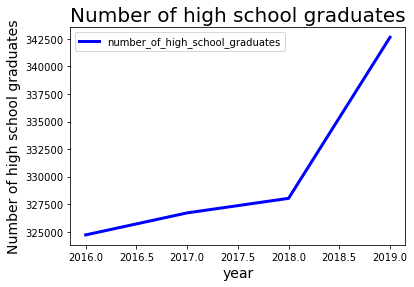

In [575]:
city = final_DataFrame[['year', 'city', 'number_of_high_school_graduates']]
city = city[city['city'] == 'תל אביב -יפו']
potential_grad = city
#potential_grad = potential_grad.groupby(['number_of_high_school_graduates'])
potential_grad.plot(x='year', y=['number_of_high_school_graduates'],linewidth=3, color='b')


# labels and title
plt.xlabel('year', fontsize=14)
plt.ylabel('Number of high school graduates', fontsize=14)
plt.title('Number of high school graduates', fontsize=20);

city


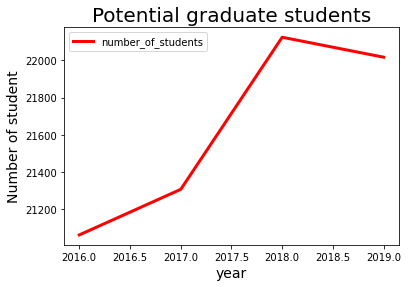

,number_of_students
year,
2016,21062.4000
2017,21307.2000
2018,22124.5780
2019,22017.3014


In [576]:
potential_grad = final_DataFrame[['year', 'city', 'number_of_students']]
potential_grad = potential_grad[potential_grad['city'] == 'תל אביב -יפו']

potential_grad = potential_grad.groupby(['year']).mean()

potential_grad.plot(linewidth=3, color='r')


plt.xlabel('year', fontsize=14)
plt.ylabel('Number of student', fontsize=14)
plt.title('Potential graduate students', fontsize=20);

plt.show()
potential_grad

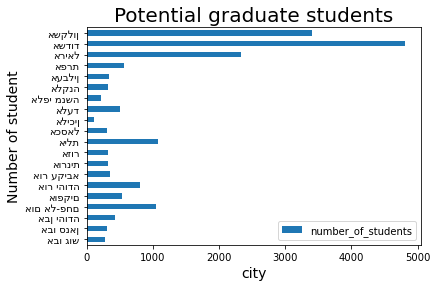

In [577]:
potential_grad = final_DataFrame[['city', 'number_of_students']]

potential_grad = potential_grad.groupby(['city']).mean()

potential_grad.head(20).plot(kind='barh')
#plt.text(0.5, 0.5, potential_grad , name = 'Arial')
# labels and title
plt.xlabel('city', fontsize=14)
plt.ylabel('Number of student', fontsize=14)
plt.title('Potential graduate students', fontsize=20);

plt.show()

In [606]:
# final_DataFrame=FillingAveValue(final_DataFrame)
number_of_potential_students='number_of_high_school_graduates_with_potential'
number_of_high_school_graduates='number_of_high_school_graduates'
Registration_for_higher_education_within_8_years='Registration_for_higher_education_within_8_years'
number_of_self_employees = 'number_of_self_employees'
employees_average_monthly_wage = 'employees_average_monthly_wage'
number_of_students='number_of_students'
number_of_graduates_students = 'number_of_bachelor_graduates'


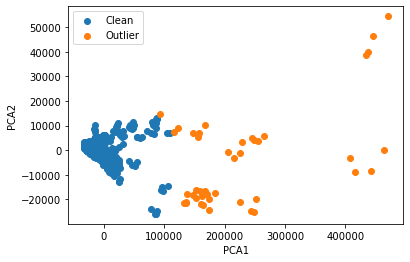

In [579]:
df_norm = final_DataFrame[['number_of_high_school_graduates', 'number_of_high_school_graduates_with_potential', 'number_of_students','number_of_bachelor_graduates']]

# Principle analysis with two components
pca = PCA(n_components = 2)
pca.fit(df_norm)

# Reformat and view results
trans_X = pca.fit_transform(df_norm)

clean_X = trans_X[(np.abs(stats.zscore(df_norm)) < 2).all(axis=1) == True, :]
outlier_X = trans_X[(np.abs(stats.zscore(df_norm)) < 2).all(axis=1) == False, :]

plt.scatter(clean_X[:, 0], clean_X[:, 1])
plt.scatter(outlier_X[:, 0], outlier_X[:, 1])
plt.ylabel('PCA2')
plt.xlabel('PCA1')
plt.legend(['Clean', 'Outlier'])
plt.show()

In [607]:
# New dataframe to calculate correlation between numeric features

corr_df = final_DataFrame[[number_of_high_school_graduates_with_potential, 
              number_of_high_school_graduates, 
             Registration_for_higher_education_within_8_years, employees_average_monthly_wage, number_of_students]]

corr=corr_df.corr(method='kendall')

corr.style.background_gradient(cmap='coolwarm').set_precision(2)
#final_DataFrame[final_DataFrame['city'] == ,]

,number_of_high_school_graduates_with_potential,number_of_high_school_graduates,Registration_for_higher_education_within_8_years,employees_average_monthly_wage,number_of_students
number_of_high_school_graduates_with_potential,1.00,0.92,0.82,0.24,0.83
number_of_high_school_graduates,0.92,1.00,0.82,0.19,0.83
Registration_for_higher_education_within_8_years,0.82,0.82,1.00,0.20,0.85
employees_average_monthly_wage,0.24,0.19,0.20,1.00,0.22
number_of_students,0.83,0.83,0.85,0.22,1.00


In [608]:

def generateGragh(columnsName,color1,color2):
    x = reshapeCol(final_DataFrame,columnsName)
    plt.scatter(x=x,y=y,c=color1,marker='s',label=columnsName)
    m = lr.fit(X=x, y=y)
    plt.plot(x,m.predict(x),color2,linewidth=3)

In [609]:
def reshapeCol(final_DataFrame,str):
  return final_DataFrame[[str]].values.reshape(final_DataFrame[str].shape[0],1)  

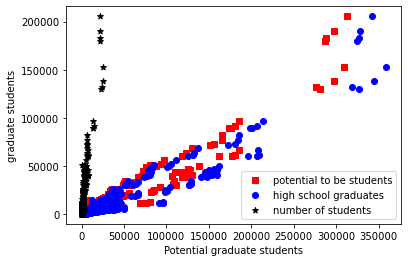

In [610]:

plt.scatter(x=final_DataFrame[number_of_potential_students],
            y=final_DataFrame[number_of_graduates_students],c='r',marker='s',label='potential to be students')

plt.scatter(x=final_DataFrame[number_of_high_school_graduates],
            y=final_DataFrame[number_of_graduates_students],c='b',marker='o',label='high school graduates')

plt.scatter(x=final_DataFrame[number_of_students],
            y=final_DataFrame[number_of_graduates_students],c='k',marker='*',label='number of students')

plt.legend(numpoints=1,loc=4)
plt.xlabel('Potential graduate students')
plt.ylabel('graduate students')
plt.show()

     employees_average_monthly_wage
1                           7071.17
2                          14054.00
3                           5869.82
4                           9398.05
5                           8953.88
..                              ...
802                        13983.03
144                         5646.35
345                         5704.66
546                         5443.67
747                         5132.41

[804 rows x 1 columns]


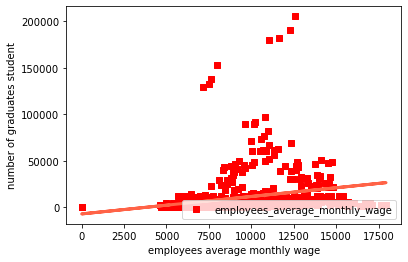

In [634]:

lr = linear_model.LinearRegression() # create a linear regression object

x = final_DataFrame[[employees_average_monthly_wage]]
y = final_DataFrame[[number_of_graduates_students]].values.reshape(final_DataFrame[number_of_graduates_students].shape[0],1)

generateGragh(employees_average_monthly_wage,'r','tomato')

m = lr.fit(X=x, y=y);

print(final_DataFrame[[employees_average_monthly_wage]])
plt.legend(numpoints=1,loc=4)
plt.xlabel("employees average monthly wage")
plt.ylabel("number of graduates student")
plt.show()

In [635]:
print("Slope: ",m.coef_)
print("intercept: ",m.intercept_)
print("R2: ", m.score(x,y))

Slope:  [[1.87669478]]
intercept:  [-7161.27715702]
R2:  0.07103727810915339


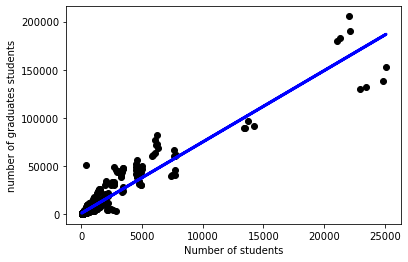

Slope: [[7.41655235]]
Intercept: [721.68541493]
R2: 0.9007900943343441


In [636]:
lr_students = linear_model.LinearRegression() # create a linear regression object


x = final_DataFrame[[number_of_students]]
y = final_DataFrame[[number_of_graduates_students]].values.reshape(final_DataFrame[number_of_graduates_students].shape[0],1)


m = lr_wage.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_wage.predict(x), color='blue', linewidth=3)

plt.xlabel('Number of students')
plt.ylabel('number of graduates students')
plt.show()

print("Slope:",m.coef_)
print("Intercept:",m.intercept_)
print("R2:",m.score(x,y))

In [637]:
lr = linear_model.LinearRegression() # create a linear regression object

x = final_DataFrame[['number_of_students','employees_average_monthly_wage']]
y = final_DataFrame[number_of_graduates_students]
lr.fit(X=x, y=y);

print("Slope:",lr.coef_)
print("Intercept:",lr.intercept_)
print("R2:",lr.score(x,y))


Slope: [7.26801848 1.00139939]
Intercept: -7791.286684919449
R2: 0.9206549629005117


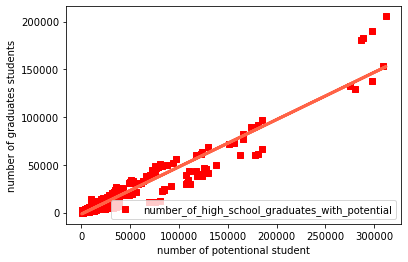

In [638]:


lr = linear_model.LinearRegression() # create a linear regression object

y = final_DataFrame[[number_of_graduates_students]].values.reshape(final_DataFrame[number_of_graduates_students].shape[0],1)


generateGragh(number_of_potential_students,'r','tomato')

#take all columns for next blocks
x = final_DataFrame[[number_of_potential_students]]


m = lr.fit(X=x, y=y);

plt.legend(numpoints=1,loc=4)
plt.xlabel("number of potentional student")
plt.ylabel("number of graduates students")
plt.show()

In [639]:
print("Slope: ",m.coef_)
print("intercept: ",m.intercept_)
print("R2: ", m.score(x,y))

Slope:  [[0.49411901]]
intercept:  [-1443.56087146]
R2:  0.9233467562049155


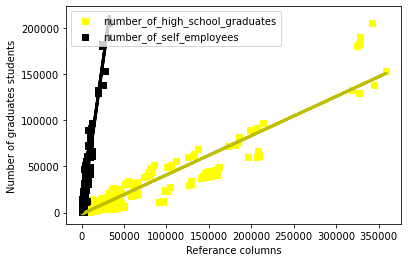

In [640]:
#/////////////////////////////////////////test 1////////////////////////////////////////////////////

lr = linear_model.LinearRegression() # create a linear regression object

y = final_DataFrame[[number_of_graduates_students]].values.reshape(final_DataFrame[number_of_graduates_students].shape[0],1)


generateGragh(number_of_high_school_graduates,'yellow','y')
generateGragh(number_of_self_employees,'k','k')

#take all columns for next blocks
x = final_DataFrame[[number_of_high_school_graduates, number_of_self_employees]]


m = lr.fit(X=x, y=y);

plt.legend(numpoints=1,loc=2)
plt.xlabel('Referance columns')
plt.ylabel("Number of graduates students")
plt.show()

In [641]:
print("R2:",lr.score(x,y))
print("R2:",r2_score(y,lr.predict(x)))

R2: 0.9345370141859777
R2: 0.9345370141859777


In [642]:
x = final_DataFrame[[number_of_students,employees_average_monthly_wage]]
y = final_DataFrame[[number_of_graduates_students]]
m = lr.fit(X=x, y=y);
print("R2:",lr.score(x,y))

R2: 0.9206549629005117


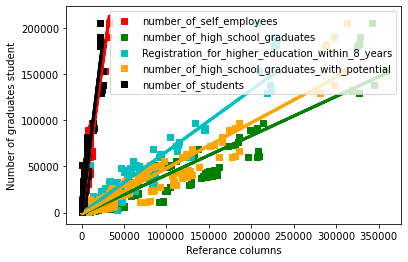

In [643]:
from sklearn import linear_model
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


lr = linear_model.LinearRegression() # create a linear regression object
y = final_DataFrame[[number_of_graduates_students]].values.reshape(final_DataFrame[number_of_graduates_students].shape[0],1)

#print(final_DataFrame)
generateGragh(number_of_self_employees,'r','r')
generateGragh(number_of_high_school_graduates,'green','green')
generateGragh(Registration_for_higher_education_within_8_years,'c','c')
generateGragh(number_of_potential_students,'orange','orange')
generateGragh(number_of_students,'k','k')

x = final_DataFrame[['number_of_high_school_graduates_with_potential','number_of_high_school_graduates','Registration_for_higher_education_within_8_years',
                    'number_of_students', 'number_of_self_employees']]

m = lr.fit(X=x, y=y);

plt.legend(numpoints=1,loc=1)
plt.xlabel('Referance columns')
plt.ylabel('Number of graduates student')
plt.show()



In [622]:
print("R2:",lr.score(x,y))

R2: 0.9698410626825883
R2: 0.9698410626825883


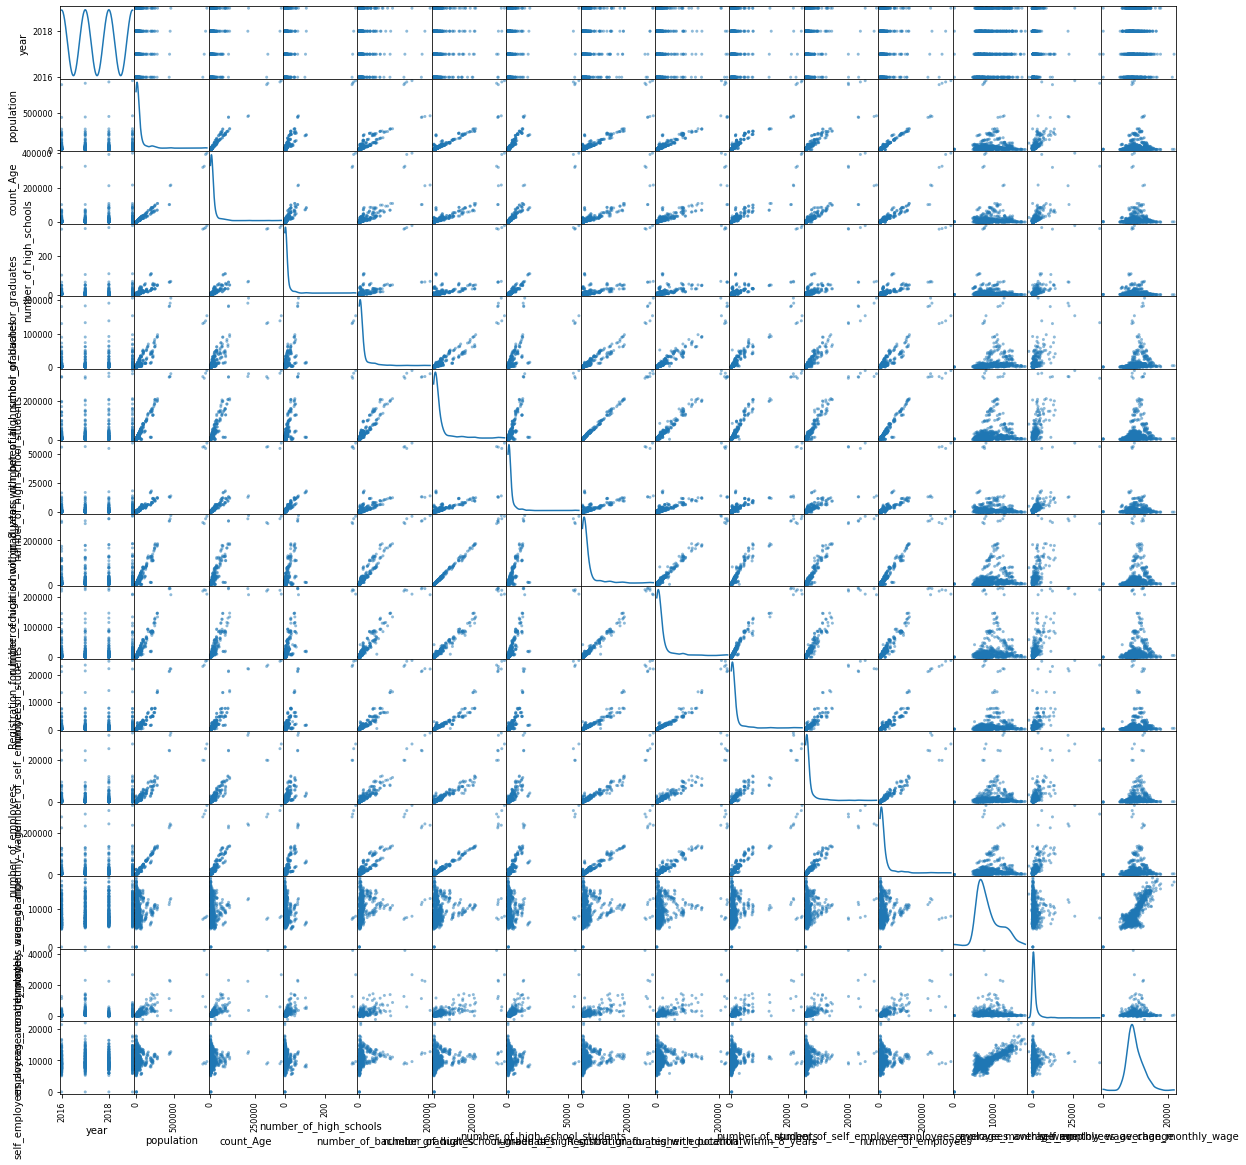

In [623]:
#print(final_DataFrame.corr())
pd.plotting.scatter_matrix(final_DataFrame, figsize=(20, 20), diagonal='kde')
plt.show()

In [633]:
final_DataFrame[final_DataFrame['city']== 'תל אביב -יפו']

,year,city,population,count_Age,number_of_high_schools,number_of_bachelor_graduates,number_of_high_school_graduates,number_of_high_school_students,number_of_high_school_graduates_with_potential,Registration_for_higher_education_within_8_years,number_of_students,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change,self_employees_average_monthly_wage
198,2019,תל אביב -יפו,460613.0,214829.9032,68.0,205571.5819,342650.0107,13872.0,312249.5527,206815.237,22017.3014,32674.0,236408.0,12590.86,3316.4136,12756.82
399,2018,תל אביב -יפו,451522.0,210905.9262,65.0,190542.2840,328030.7330,12614.0,297552.9980,227115.566,22124.5780,31581.0,242777.0,12273.30,22169.7302,12230.61
600,2017,תל אביב -יפו,443900.0,102318.9500,64.0,182442.9000,326710.4000,13032.0,288535.0000,229052.400,21307.2000,24249.0,232455.0,11606.02,22772.0700,12439.30
801,2016,תל אביב -יפו,438800.0,101801.6000,64.0,180346.8000,324712.0000,13037.0,286975.2000,226420.800,21062.4000,24447.0,223935.0,11017.00,10970.0000,11908.00
